In [4]:
import numpy as np 
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
from sklearn.datasets import fetch_california_housing
load_california = fetch_california_housing() 
X = load_california.data 
y = load_california.target 

data = pd.DataFrame(X, columns=load_california.feature_names) 
data["SalePrice"] = y # saleprice 
data.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [7]:
print(load_california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
print(data.shape)

(20640, 9)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


EDA->Exploitary data analysis

In [11]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

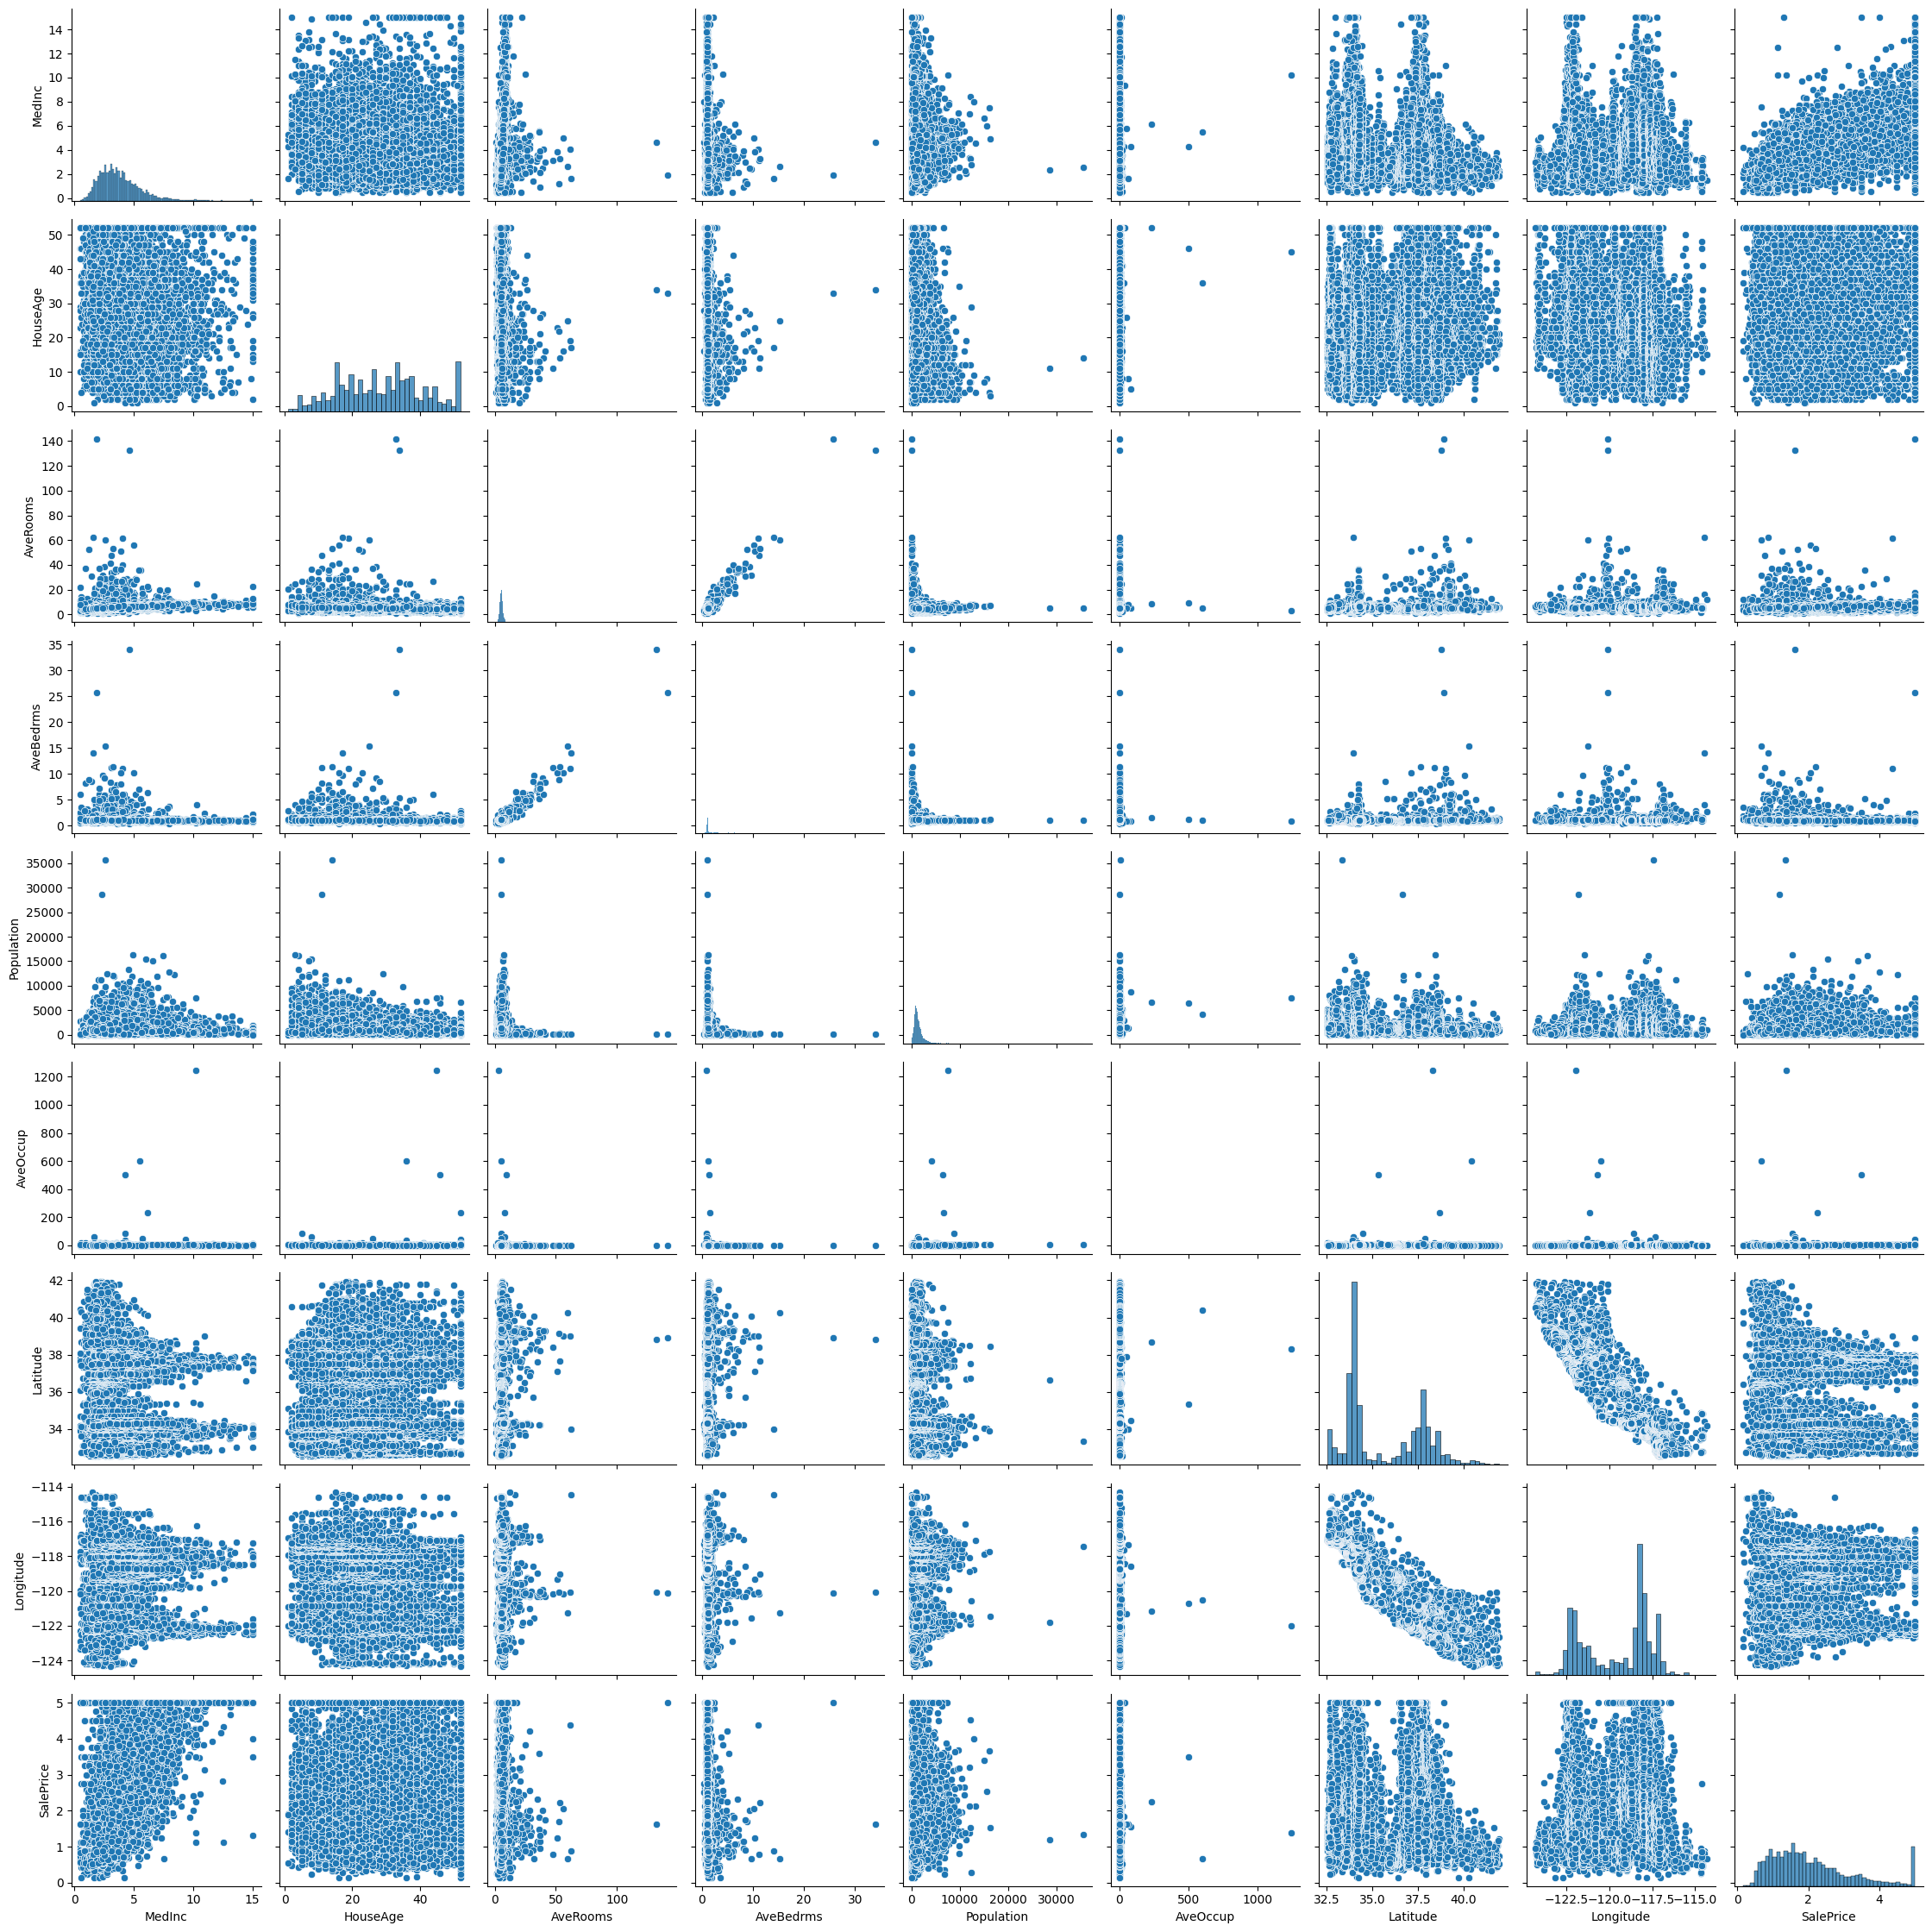

In [12]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_14128\3545255702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

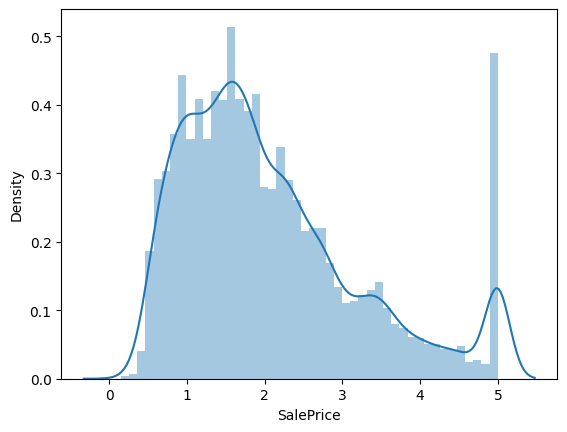

In [13]:
sns.distplot(data['SalePrice'])

In [14]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 0.977763
Kurtosis: 0.327870


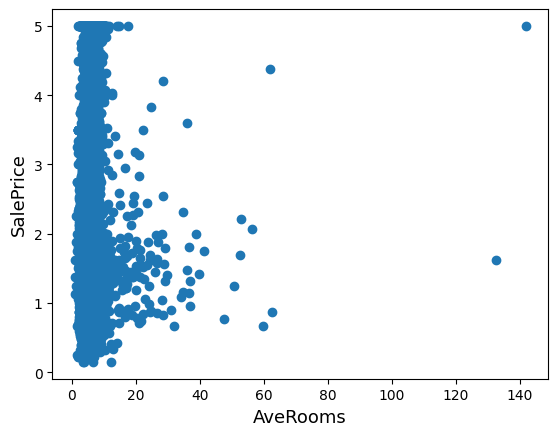

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = data['AveRooms'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('AveRooms', fontsize=13)
plt.show()

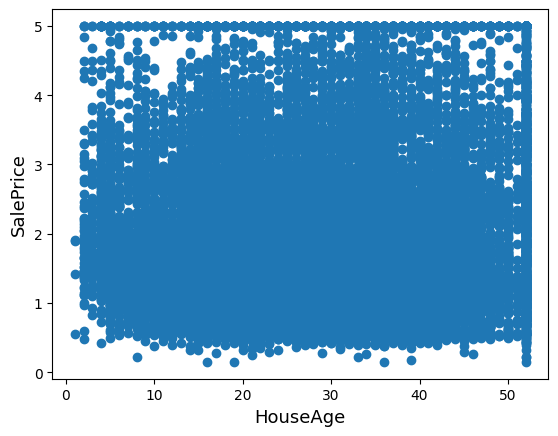

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = data['HouseAge'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('HouseAge', fontsize=13)
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_14128\1185872645.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
C:\Users\KIIT\AppData\Local\Temp\ipykernel_14128\1185872645.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'] , fit=norm)



 mu = 2.07 and sigma = 1.15



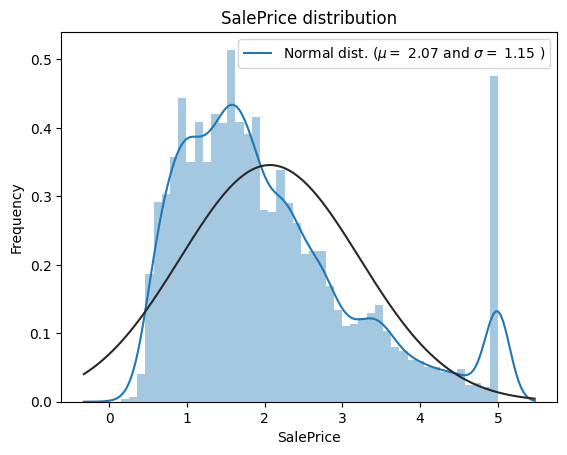

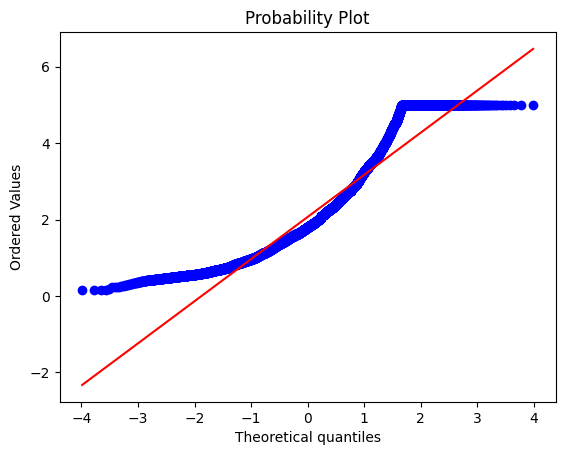

In [17]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['SalePrice'] , fit=norm)

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_14128\1099305546.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
C:\Users\KIIT\AppData\Local\Temp\ipykernel_14128\1099305546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'] , fit=norm);



 mu = 1.06 and sigma = 0.36



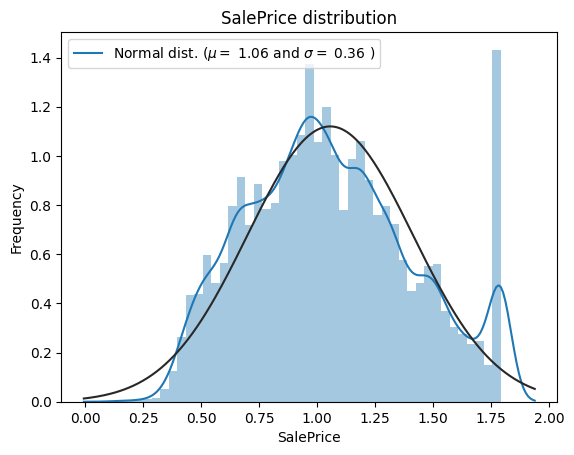

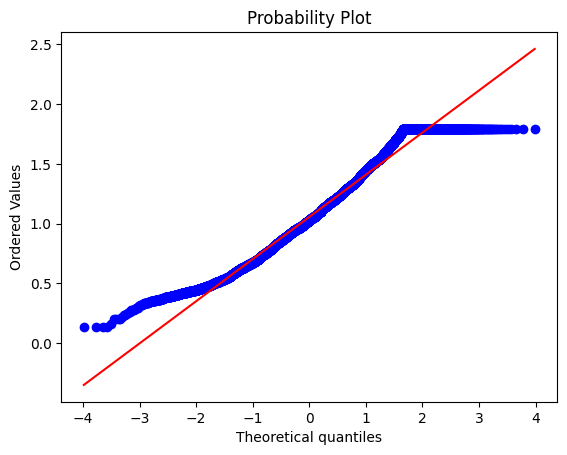

In [18]:
data["SalePrice"] = np.log1p(data["SalePrice"])

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

Data Correlation

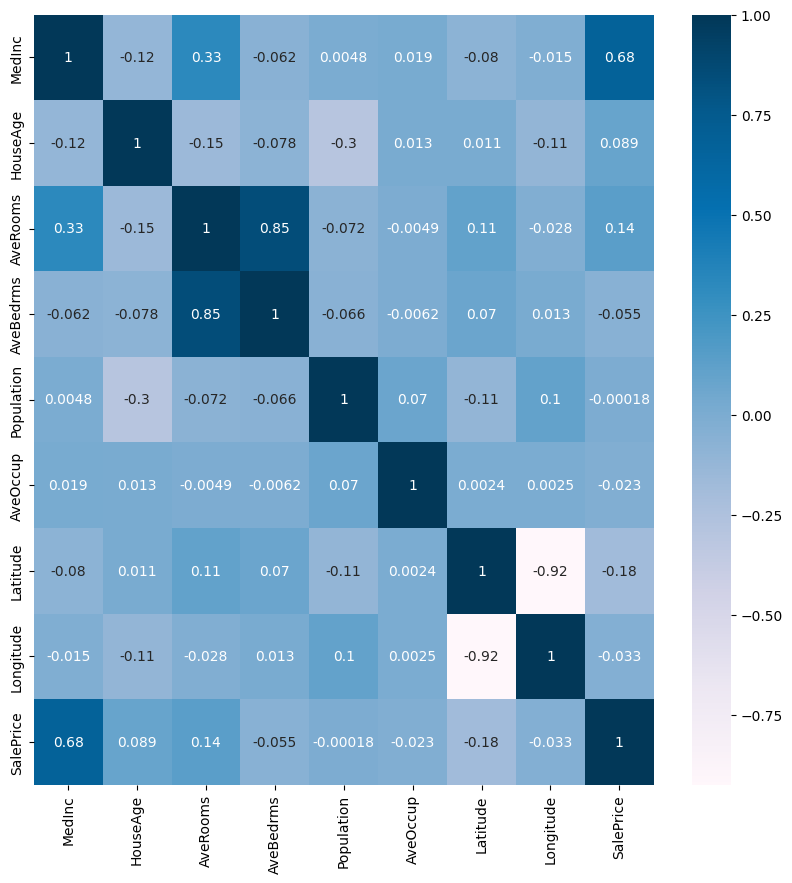

In [19]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [21]:
cor_target = abs(cor["SalePrice"]) # absolute value of the correlation 

relevant_features = cor_target[cor_target>0.1] # highly correlated features 

names = [index for index, value in relevant_features.items()] # getting the names of the features 

names.remove('SalePrice') # removing target feature 

print(names) # printing the features 
print(len(names))

['MedInc', 'AveRooms', 'Latitude']
3


Model Building

In [22]:
from sklearn.model_selection import train_test_split 

X = data.drop("SalePrice", axis=1) 
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [24]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
predictions = lr.predict(X_test)  

print("Actual value of the house:- ", y_test[0]) 
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  1.7094642265012248
Model Predicted Value:-  0.6275833553422832


In [26]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)

0.22436602177852205
